<a href="https://colab.research.google.com/github/ViniciuscRodrigues/Aprendizado-N-o-Supervisionado/blob/main/T1P2IAipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset Escolhido: Breast Cancer Wisconsin (Diagnostic)

Origem: UCI Machine Learning Repository.

Objetivo: Classificar se um tumor é maligno ou benigno com base em características extraídas de imagens digitalizadas.

Atributos: 30 características numéricas (raio, textura, perímetro, área, suavidade, etc.) calculadas a partir de uma imagem digitalizada de uma massa mamária.

Dados Rotulados (Target): Variável binária (0 = Maligno, 1 = Benigno).

Problema: Classificação Binária.

Tratamento de Dados:

Verificação de nulos: O dataset original é limpo e não possui valores ausentes.

Normalização/Padronização: Será utilizado o StandardScaler para padronizar as características, pois modelos lineares (como Regressão Logística) são sensíveis à escala dos dados.

In [ ]:
# Importação das bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Datasets
from sklearn.datasets import load_breast_cancer, fetch_california_housing

# Pré-processamento e Seleção de Modelo
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Modelos de Classificação
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Modelos de Regressão
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Métricas de Avaliação
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Configuração de estilo dos gráficos
sns.set_theme(style="whitegrid")

Faremos o treinamento de dois modelos:

Regressão Logística: Um modelo linear simples e eficaz para problemas binários.

Random Forest Classifier: Um modelo baseado em ensemble (árvores de decisão) que captura relações não lineares.

In [ ]:
# --- Carregamento ---
data_cancer = load_breast_cancer()
df_cancer = pd.DataFrame(data_cancer.data, columns=data_cancer.feature_names)
df_cancer['target'] = data_cancer.target

print("Amostra do Dataset Breast Cancer:")
display(df_cancer.head())

# --- Pré-processamento ---
# 1. Separação em features (X) e target (y)
X_cls = df_cancer.drop('target', axis=1)
y_cls = df_cancer['target']

# 2. Divisão em Treino e Teste (80% treino, 20% teste)
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X_cls, y_cls, test_size=0.2, random_state=42)

# 3. Padronização (StandardScaler)
# É importante ajustar (fit) o scaler apenas nos dados de treino para evitar vazamento de dados
scaler_cls = StandardScaler()
X_train_cls_scaled = scaler_cls.fit_transform(X_train_cls)
X_test_cls_scaled = scaler_cls.transform(X_test_cls)

Amostra do Dataset Breast Cancer:


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
# Modelo 1: Regressão Logística
log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train_cls_scaled, y_train_cls)
y_pred_log = log_reg.predict(X_test_cls_scaled)

# Modelo 2: Random Forest
rf_cls = RandomForestClassifier(random_state=42)
rf_cls.fit(X_train_cls, y_train_cls) # Random Forest não exige necessariamente dados normalizados, mas pode usar
y_pred_rf = rf_cls.predict(X_test_cls)

Comparação e Avaliação (Classificação)

Acurácia Regressão Logística: 0.9737
Acurácia Random Forest: 0.9649

Relatório de Classificação (Regressão Logística):
               precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



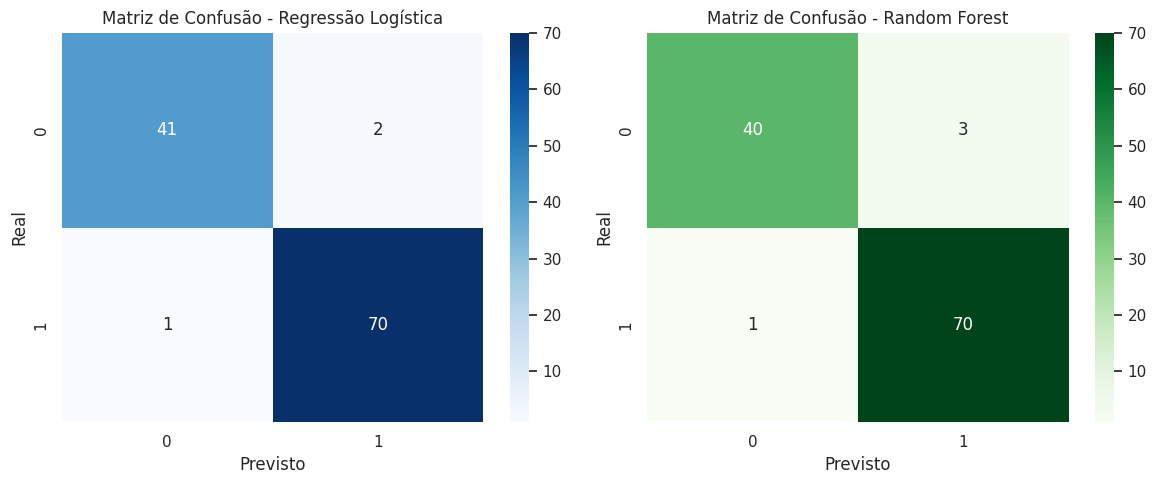

/tmp/ipython-input-2546310790.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Regressão Logística', 'Random Forest'], y=[acc_log, acc_rf], palette='viridis')


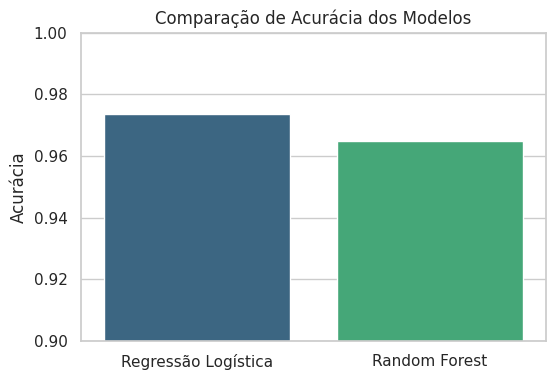

In [ ]:
# --- Métricas ---
acc_log = accuracy_score(y_test_cls, y_pred_log)
acc_rf = accuracy_score(y_test_cls, y_pred_rf)

print(f"Acurácia Regressão Logística: {acc_log:.4f}")
print(f"Acurácia Random Forest: {acc_rf:.4f}")
print("\nRelatório de Classificação (Regressão Logística):\n", classification_report(y_test_cls, y_pred_log))

# --- Gráficos Comparativos ---
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Matriz de Confusão - Regressão Logística
sns.heatmap(confusion_matrix(y_test_cls, y_pred_log), annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Matriz de Confusão - Regressão Logística')
axes[0].set_xlabel('Previsto')
axes[0].set_ylabel('Real')

# Matriz de Confusão - Random Forest
sns.heatmap(confusion_matrix(y_test_cls, y_pred_rf), annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title('Matriz de Confusão - Random Forest')
axes[1].set_xlabel('Previsto')
axes[1].set_ylabel('Real')

plt.tight_layout()
plt.show()

# Comparativo de Acurácia
plt.figure(figsize=(6, 4))
sns.barplot(x=['Regressão Logística', 'Random Forest'], y=[acc_log, acc_rf], palette='viridis')
plt.title('Comparação de Acurácia dos Modelos')
plt.ylim(0.9, 1.0) # Ajuste de escala para ver melhor a diferença se for pequena
plt.ylabel('Acurácia')
plt.show()

Regressão


Dataset Escolhido: California Housing

Origem: StatLib repository (dados do censo de 1990 da Califórnia).

Objetivo: Prever o valor médio das casas em um distrito (quarteirão) da Califórnia.

Atributos: 8 características numéricas (renda média no bloco, idade média das casas, média de quartos, população, latitude, longitude, etc.).

Dados Rotulados (Target): MedHouseVal (Valor médio da casa em unidades de $100.000).

Problema: Regressão.

Tratamento de Dados:

Verificação de nulos: O dataset padrão do sklearn é limpo.

Normalização: Aplicaremos padronização, útil especialmente para a Regressão Linear.

In [ ]:
# --- Carregamento ---
data_housing = fetch_california_housing()
df_housing = pd.DataFrame(data_housing.data, columns=data_housing.feature_names)
df_housing['Target'] = data_housing.target

print("Amostra do Dataset California Housing:")
display(df_housing.head())

# --- Pré-processamento ---
X_reg = df_housing.drop('Target', axis=1)
y_reg = df_housing['Target']

# Divisão Treino/Teste
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Padronização
scaler_reg = StandardScaler()
X_train_reg_scaled = scaler_reg.fit_transform(X_train_reg)
X_test_reg_scaled = scaler_reg.transform(X_test_reg)

Amostra do Dataset California Housing:


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


Regressão Linear Múltiplia: Modelo base que assume uma relação linear entre as características e o preço das casas.

Random Forest Regressor: Modelo mais robusto capaz de capturar complexidades não lineares nos preços imobiliários.

In [ ]:
# Modelo 1: Regressão Linear
lin_reg = LinearRegression()
lin_reg.fit(X_train_reg_scaled, y_train_reg)
y_pred_lin = lin_reg.predict(X_test_reg_scaled)

# Modelo 2: Random Forest Regressor
rf_reg = RandomForestRegressor(n_estimators=50, random_state=42)
rf_reg.fit(X_train_reg, y_train_reg)
y_pred_rf_reg = rf_reg.predict(X_test_reg)

Comparação e Avaliação (Regressão)

Regressão Linear - R2: 0.5758, RMSE: 0.7456
Random Forest - R2: 0.8037, RMSE: 0.5072


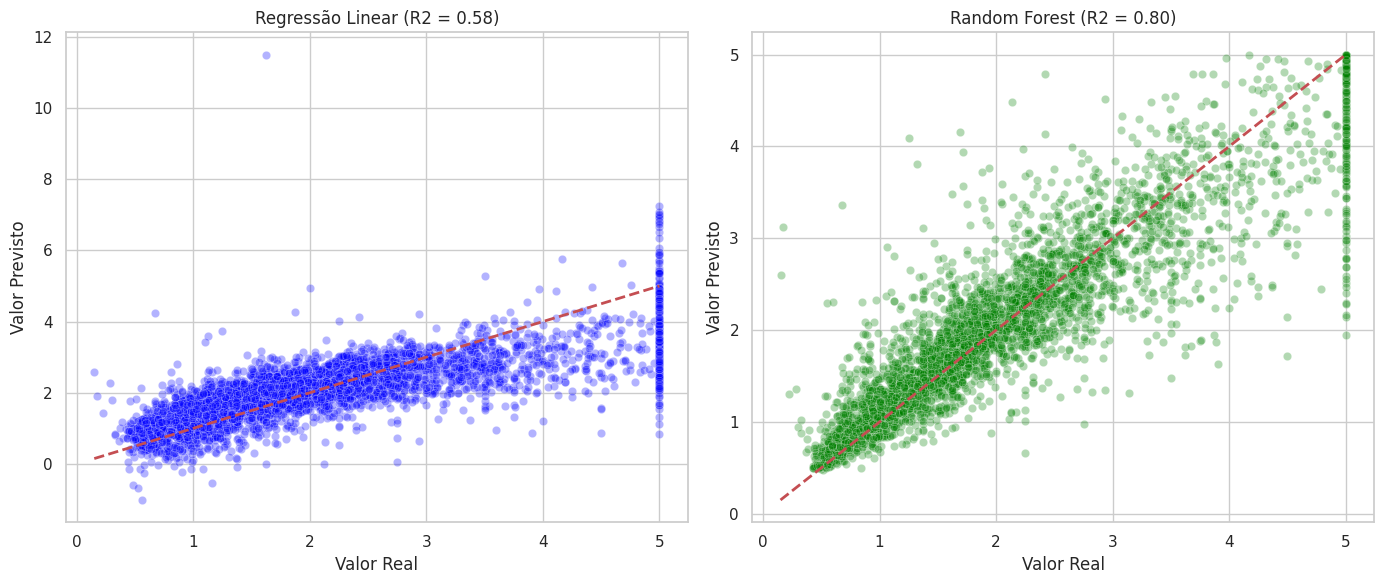

/tmp/ipython-input-4166058534.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Regressão Linear', 'Random Forest'], y=[r2_lin, r2_rf_reg], palette='magma')


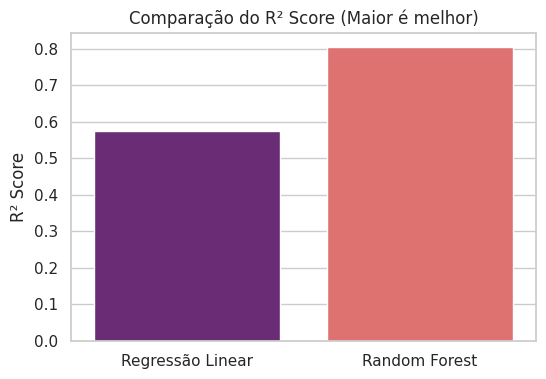

In [ ]:
# --- Métricas ---
# R2 Score (quanto mais próximo de 1.0, melhor)
r2_lin = r2_score(y_test_reg, y_pred_lin)
r2_rf_reg = r2_score(y_test_reg, y_pred_rf_reg)

# RMSE (Root Mean Squared Error) - quanto menor, melhor
rmse_lin = np.sqrt(mean_squared_error(y_test_reg, y_pred_lin))
rmse_rf_reg = np.sqrt(mean_squared_error(y_test_reg, y_pred_rf_reg))

print(f"Regressão Linear - R2: {r2_lin:.4f}, RMSE: {rmse_lin:.4f}")
print(f"Random Forest - R2: {r2_rf_reg:.4f}, RMSE: {rmse_rf_reg:.4f}")

# --- Gráficos Comparativos ---
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Gráfico de Dispersão: Real vs Previsto (Linear Regression)
sns.scatterplot(x=y_test_reg, y=y_pred_lin, alpha=0.3, ax=axes[0], color='blue')
axes[0].plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], 'r--', lw=2) # Linha ideal
axes[0].set_title(f'Regressão Linear (R2 = {r2_lin:.2f})')
axes[0].set_xlabel('Valor Real')
axes[0].set_ylabel('Valor Previsto')

# Gráfico de Dispersão: Real vs Previsto (Random Forest)
sns.scatterplot(x=y_test_reg, y=y_pred_rf_reg, alpha=0.3, ax=axes[1], color='green')
axes[1].plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], 'r--', lw=2) # Linha ideal
axes[1].set_title(f'Random Forest (R2 = {r2_rf_reg:.2f})')
axes[1].set_xlabel('Valor Real')
axes[1].set_ylabel('Valor Previsto')

plt.tight_layout()
plt.show()

# Comparativo de R2 Score
plt.figure(figsize=(6, 4))
sns.barplot(x=['Regressão Linear', 'Random Forest'], y=[r2_lin, r2_rf_reg], palette='magma')
plt.title('Comparação do R² Score (Maior é melhor)')
plt.ylabel('R² Score')
plt.show()